# Order Frequency by Material
- Get an understanding of how common material orders are
- Determine differences in orders by material
- Fit distributions for inter-arrival rate of orders

We are more concerned with dates that orders are expected than dates that orders are placed.

Imports

In [4]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import fitter
import matplotlib.dates as mdates
import datetime
import matplotlib.ticker as mtick
conn = sqlite3.connect('test_database')
c = conn.cursor()

What materials are included in the Series I Chair?

In [28]:
query = """
SELECT *
FROM (SELECT material, material_group FROM reliability_table GROUP BY material, material_group) as t1
     LEFT JOIN components_table as t2 on t1.material = t2.part_number
WHERE t2.part_number is not NULL
     AND t2.Part_Desciption is not Null
GROUP BY t1.material, t1.material_group, t2.Part_Desciption, t2.part_number
"""
df = pd.read_sql_query(query,conn)
df

,material,material_group,Part_Number,Part_Desciption,Series_1,Supplier
0,1002004805,008,1002004805,ANTI-NOISE CASTER-SOFT-DIA65-BLACK,X,STEELCASE SA (FRANCE)
1,1002004805-6059,008,1002004805-6059,ANTI-NOISE CASTER-SOFT-DIA65-STERLDARK,X,EMILSIDER MECCANICA SPA
2,1023929001,009,1023929001,"HOUSING - MECHANISM, CHAIR",X,TRU DIE CAST CORPORATION
3,1023930001,073,1023930001,"CONTROL MECH - LINK, FRONT",X,ROYAL TECHNOLOGIES CORPORATION
4,1023931001,018,1023931001,"PIN - SHLDR, DOUBLE END",X,MANUFACTURERS SUPPLY CO
...,...,...,...,...,...,...
156,892800000,040,892800000,SECURE-A-TAG 9.000,X,GREAT LAKES LABEL LLC
157,905545300,059,905545300,"STRING - DRAW, COVER",X,HOPE GLOBAL DIV NFA CORP
158,909045320,059,909045320,STRIP - DRAW,X,ERVINS GROUP LLC
159,909518352,059,909518352,"THREAD - NYLON, DRAWSTRING, BLACK",X,ERVINS GROUP LLC


For a sample month, September 2021, find the order frequency by materials.

In [45]:
query = """
SELECT Material, Month, avg(days_late) as avg_days_late, count(*) as orders
FROM (
    SELECT strftime('%Y-%m-01',Scheduled_relevant_delivery_date) as Month, Material, Material_Group, -(julianday(Scheduled_relevant_delivery_date) - julianday(Posting_Date)) as days_late, Scheduled_relevant_delivery_date, Posting_Date
    FROM reliability_table
    WHERE Material in (SELECT distinct(part_number) from components_table)
    ORDER BY date(Scheduled_relevant_delivery_date) desc
) as temp_t
WHERE Month = '2021-09-01'
GROUP BY Material, Month
"""
df = pd.read_sql_query(query,conn)
df

,Material,Month,avg_days_late,orders
0,1023929001,2021-09-01,3.000000,1
1,1023930001,2021-09-01,0.000000,5
2,1023931001,2021-09-01,-1.476190,21
3,1023933001,2021-09-01,-1.352941,17
4,1023933002,2021-09-01,-1.450000,20
...,...,...,...,...
106,858000505,2021-09-01,-12.666667,3
107,865246501,2021-09-01,-1.285714,7
108,905545300,2021-09-01,-0.500000,2
109,909045320,2021-09-01,-1.000000,1


Find number of orders per month by material group

In [60]:
query = """
SELECT Material_Group, Month, count(*) as orders
FROM (
    SELECT strftime('%Y-%m-01',Scheduled_relevant_delivery_date) as Month, Material, Material_Group, -(julianday(Scheduled_relevant_delivery_date) - julianday(Posting_Date)) as days_late, Scheduled_relevant_delivery_date, Posting_Date
    FROM reliability_table
    WHERE Material in (SELECT distinct(part_number) from components_table)
    ORDER BY date(Scheduled_relevant_delivery_date) desc
) as temp_t
GROUP BY Material_GROUP, Month
ORDER BY count(*) DESC
--LIMIT 120
"""
df = pd.read_sql_query(query,conn)
df

,Material_Group,Month,orders
0,073,2019-06-01,969
1,073,2019-07-01,969
2,073,2019-05-01,958
3,073,2020-10-01,952
4,073,2019-04-01,945
...,...,...,...
489,059,2020-05-01,1
490,059,2022-09-01,1
491,059,2022-10-01,1
492,073,2022-10-01,1


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, 

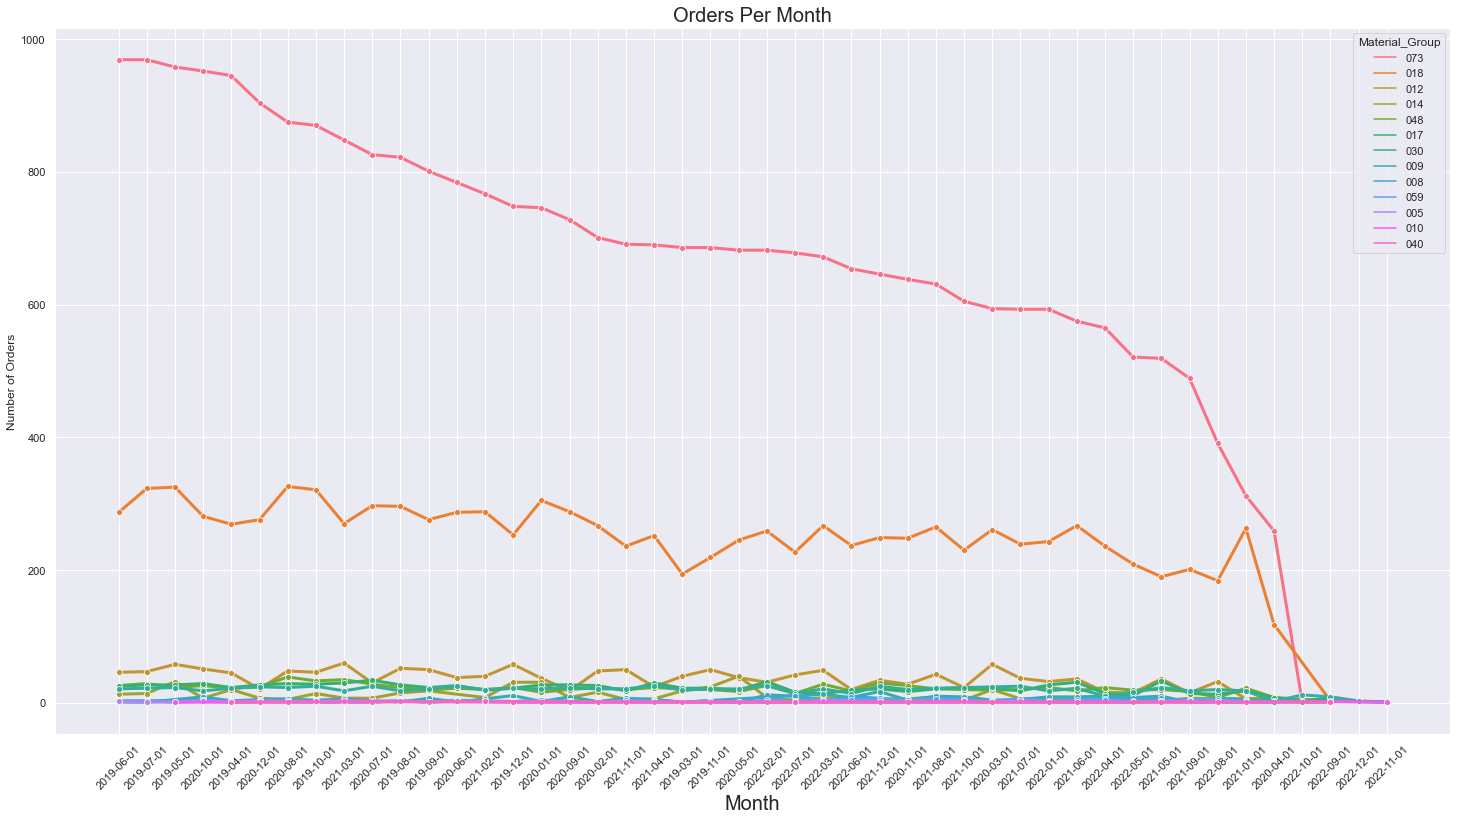

In [61]:
sns.set(rc={'figure.figsize':(25,13)})
g = sns.lineplot(data=df, x='Month', y='orders', hue='Material_Group', marker='o', lw=3)
# g.set_yscale("log")
g.set_xlabel( "Month" , size = 20 )
g.set_ylabel("Number of Orders")
g.set_title( "Orders Per Month" , size = 20 )
plt.xticks(rotation=45)
# for ind, row in df.iterrows():
#      plt.text(row['Month'], row['orders'], row["Material"], horizontalalignment='left', size='medium', color='black', weight='semibold')

Same thing, but now assume multiple orders expected in the same day are really just one order

In [40]:
query = """
SELECT Material_Group, Month, count(*) as orders
FROM(
     SELECT Material_Group, Month, Scheduled_relevant_delivery_date
     FROM (
         SELECT strftime('%Y-%m-01',Scheduled_relevant_delivery_date) as Month, Material, Material_Group, -(julianday(Scheduled_relevant_delivery_date) - julianday(Posting_Date)) as days_late, Scheduled_relevant_delivery_date, Posting_Date
         FROM reliability_table
         WHERE Material in (SELECT distinct(part_number) from components_table)
         ORDER BY date(Scheduled_relevant_delivery_date) desc
     ) as temp_t
     GROUP BY Material_Group, Month, Scheduled_relevant_delivery_date
) as temp_t
GROUP BY Material_Group, Month
"""
df = pd.read_sql_query(query,conn)
df

,Material_Group,Month,orders
0,005,2019-03-01,1
1,005,2019-04-01,1
2,005,2019-05-01,1
3,005,2019-06-01,2
4,005,2019-07-01,1
...,...,...,...
489,073,2022-08-01,21
490,073,2022-09-01,3
491,073,2022-10-01,1
492,073,2022-11-01,1


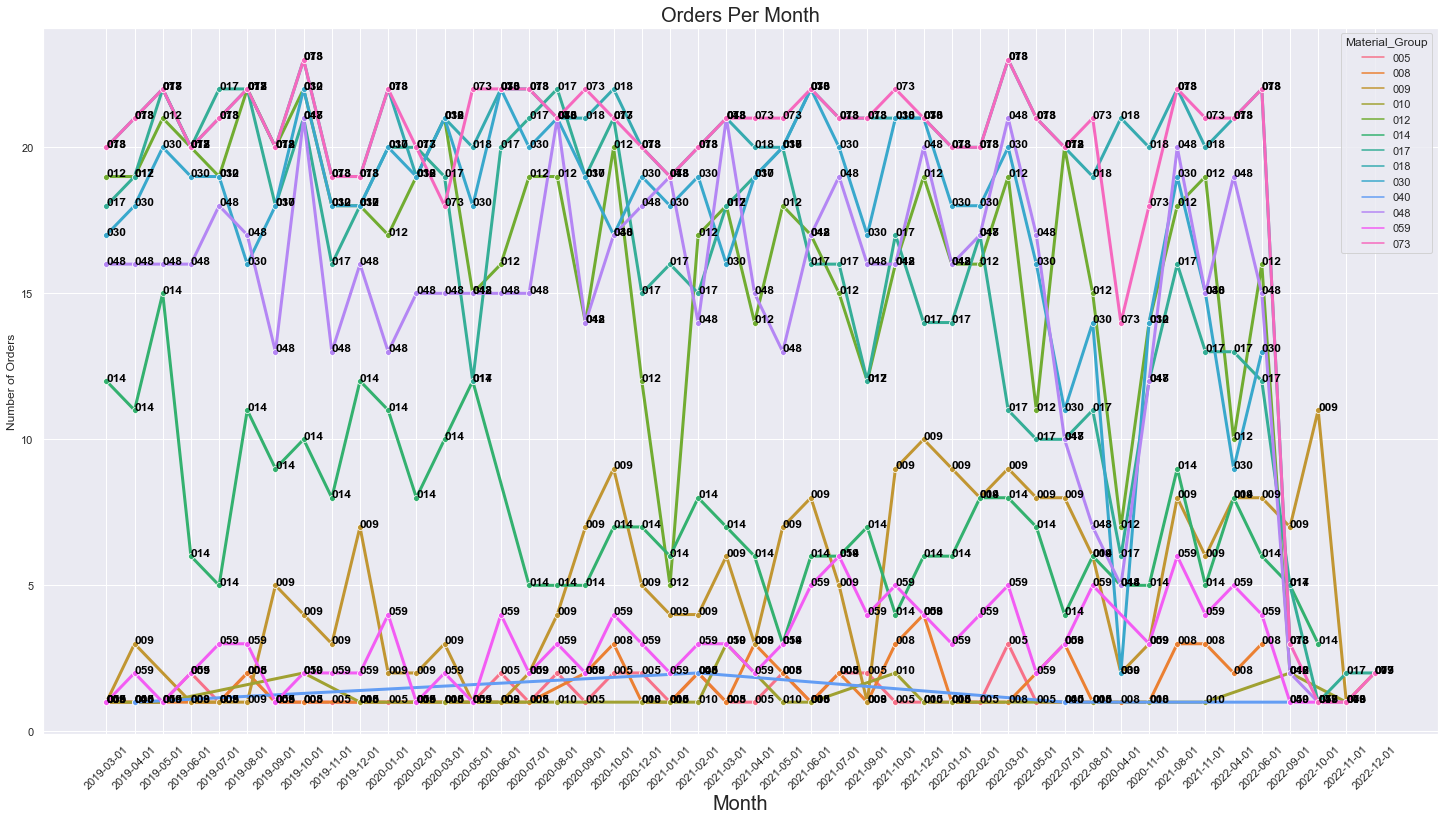

In [42]:
sns.set(rc={'figure.figsize':(25,13)})
g = sns.lineplot(data=df, x='Month', y='orders', hue='Material_Group', marker='o', lw=3)
# g.set_yscale("log")
g.set_xlabel( "Month" , size = 20 )
g.set_ylabel("Number of Orders")
g.set_title( "Orders Per Month" , size = 20 )
plt.xticks(rotation=45)
for ind, row in df.iterrows():
     plt.text(row['Month'], row['orders'], row["Material_Group"], horizontalalignment='left', size='medium', color='black', weight='semibold')

Why is material group 73 so much more frequent? Let's dig in.

In [67]:
### Strange, this means that there placing a ton of 073 orders on the same day. Why?
query = """
SELECT Material_Group, Material, count(*) as number_unique_orders
FROM(
     SELECT PO_Number, PO_Line_Number, strftime('%Y-%m-01',Scheduled_relevant_delivery_date) as Month, Material, Material_Group, Scheduled_relevant_delivery_date, Posting_Date
     FROM reliability_table
     WHERE Material in (SELECT distinct(part_number) from components_table)
     AND material_group = '073'
     AND month = '2021-09-01'
     ORDER BY date(Scheduled_relevant_delivery_date) desc
) as temp_t
GROUP BY Material_Group, Material
ORDER BY count(*) desc
"""
df = pd.read_sql_query(query,conn)
df

,Material_Group,Material,number_unique_orders
0,073,1025207001-6205,21
1,073,1025207001-6053,20
2,073,1027349001,20
3,073,1027948001-6053,20
4,073,1025207002-6053,19
...,...,...,...
68,073,1027949001-5U26,1
69,073,1071601001-5U25,1
70,073,1071601001-5U26,1
71,073,1071601001-5U28,1


In [69]:
# Material 1025207001-6205 is being ordered alot. Why?
### Strange, this means that there placing a ton of 073 orders on the same day. Why?
### The part is "BUSHING - ARM BLACK"
query = """
SELECT PO_Number, PO_Line_Number, strftime('%Y-%m-01',Scheduled_relevant_delivery_date) as Month, Material, Material_Group, Scheduled_relevant_delivery_date, Posting_Date, PO_Document_Date
FROM reliability_table
WHERE Material in (SELECT distinct(part_number) from components_table)
AND material_group = '073'
AND month = '2021-09-01'
AND Material = '1025207001-6205'
ORDER BY date(Scheduled_relevant_delivery_date) desc
"""
df = pd.read_sql_query(query,conn)
df

,PO_Number,PO_Line_Number,Month,Material,Material_Group,Scheduled_relevant_delivery_date,Posting_Date,PO_Document_Date
0,4510379678,4,2021-09-01,1025207001-6205,073,2021-09-30 00:00:00,2021-09-30 00:00:00,2021-09-23
1,4510377825,8,2021-09-01,1025207001-6205,073,2021-09-29 00:00:00,2021-09-29 00:00:00,2021-09-22
2,4510376064,5,2021-09-01,1025207001-6205,073,2021-09-28 00:00:00,2021-09-28 00:00:00,2021-09-21
3,4510374481,10,2021-09-01,1025207001-6205,073,2021-09-27 00:00:00,2021-09-27 00:00:00,2021-09-20
4,4510371682,7,2021-09-01,1025207001-6205,073,2021-09-24 00:00:00,2021-09-24 00:00:00,2021-09-17
5,4510369950,2,2021-09-01,1025207001-6205,073,2021-09-23 00:00:00,2021-09-23 00:00:00,2021-09-16
6,4510368073,7,2021-09-01,1025207001-6205,073,2021-09-22 00:00:00,2021-09-22 00:00:00,2021-09-15
7,4510366227,6,2021-09-01,1025207001-6205,073,2021-09-21 00:00:00,2021-09-21 00:00:00,2021-09-14
8,4510364012,9,2021-09-01,1025207001-6205,073,2021-09-20 00:00:00,2021-09-20 00:00:00,2021-09-12
9,4510361499,9,2021-09-01,1025207001-6205,073,2021-09-17 00:00:00,2021-09-17 00:00:00,2021-09-10


In [ ]:
### They are ordering this pretty much every couple of days so that it wil come every day. Why not just order in bulk
# ?

In [9]:
### Fit to distribution
query = """
SELECT Material, Month, due_date, previous_date, julianday(due_date) - julianday(previous_date) as inter_arrival_days
FROM(
     SELECT Material, month, Scheduled_relevant_delivery_date as due_date, LAG(Scheduled_relevant_delivery_date,1)
         OVER (PARTITION BY Material ORDER BY Scheduled_relevant_delivery_date) AS previous_date
     FROM(
          SELECT PO_Number, PO_Line_Number, strftime('%Y-%m-01',Scheduled_relevant_delivery_date) as Month, Material, Material_Group, Scheduled_relevant_delivery_date, Posting_Date, PO_Document_Date
          FROM reliability_table
          WHERE Material in (SELECT distinct(part_number) from components_table)
          AND date(Scheduled_relevant_Delivery_Date) < date('2022-05-01')
          ORDER BY date(Scheduled_relevant_delivery_date) desc
     ) as temp_t
     where Material = '1025207001-6205'
     --AND month = '2021-09-01'
) as temp_t
"""
df = pd.read_sql_query(query,conn)
df
# df.groupby("Material").agg('mean')[['inter_arrival_days']]

,Material,month,due_date,previous_date,inter_arrival_days
0,1025207001-6205,2019-03-01,2019-03-01 00:00:00,None,NaN
1,1025207001-6205,2019-03-01,2019-03-05 00:00:00,2019-03-01 00:00:00,4.0
2,1025207001-6205,2019-03-01,2019-03-06 00:00:00,2019-03-05 00:00:00,1.0
3,1025207001-6205,2019-03-01,2019-03-07 00:00:00,2019-03-06 00:00:00,1.0
4,1025207001-6205,2019-03-01,2019-03-08 00:00:00,2019-03-07 00:00:00,1.0
...,...,...,...,...,...
745,1025207001-6205,2022-04-01,2022-04-25 00:00:00,2022-04-22 00:00:00,3.0
746,1025207001-6205,2022-04-01,2022-04-26 00:00:00,2022-04-25 00:00:00,1.0
747,1025207001-6205,2022-04-01,2022-04-27 00:00:00,2022-04-26 00:00:00,1.0
748,1025207001-6205,2022-04-01,2022-04-28 00:00:00,2022-04-27 00:00:00,1.0


/Users/whitmanblass/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:4837: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]


Noe begin trying to fit inter arrival time to individual parts

In [10]:
data = df['inter_arrival_days'].dropna()
data

/Users/whitmanblass/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:4837: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]


1      4.0
2      1.0
3      1.0
4      1.0
5      3.0
      ... 
745    3.0
746    1.0
747    1.0
748    1.0
749    1.0
Name: inter_arrival_days, Length: 749, dtype: float64

/Users/whitmanblass/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:4837: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]
Fitting 106 distributions:   0%|          | 0/106 [00:00<?, ?it/s]/Users/whitmanblass/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:4837: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]
Fitting 106 distributions:  92%|█████████▏| 98/106 [02:48<00:15,  1.96s/it]/Users/whitmanblass/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the 

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gennorm,3.478971,2650.119436,-4003.773531,inf,0.466622,5.670047e-150
nakagami,4.514826,inf,-3808.561658,inf,0.762495,0.000000e+00
dgamma,4.899413,4266.034321,-3747.331875,inf,0.466622,5.669907e-150
dweibull,5.592062,1462.439711,-3648.289524,inf,0.466624,5.656246e-150
foldcauchy,5.706975,1770.014571,-3633.054182,inf,0.467618,1.192954e-150


/Users/whitmanblass/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


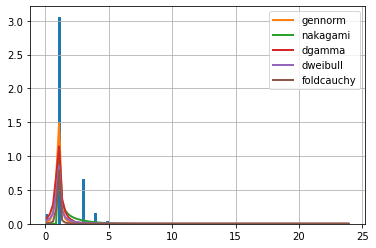

In [11]:
f = fitter.Fitter(data)
f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f.summary()

In [13]:
f.get_best()

{'gennorm': {'beta': 0.379544995916935,
  'loc': 0.9999999999999998,
  'scale': 0.005818640492646186}}

In [14]:
from scipy.stats import gennorm

In [16]:
gennorm.pdf([.1,.2,.3,.4,.5,.6,.7,.8,.9,1], beta=.379544995916, loc=1, scale=.005)

array([1.97429175e-02, 2.70204586e-02, 3.79318139e-02, 5.49581375e-02,
       8.29310644e-02, 1.32200757e-01, 2.28164558e-01, 4.47992230e-01,
       1.14471918e+00, 2.58577103e+01])

In [19]:
gennorm.rvs(beta=.37954499, loc=1, scale=.005, size=100, random_state=None)

array([ 1.01721568,  1.03574302,  1.01535122,  0.74969246,  0.98217314,
        0.48860903,  0.99908447,  1.07485423,  0.88004427,  0.79399512,
        0.94195066,  1.03342866,  1.04298719,  0.98511613,  1.11822651,
       -0.8645622 ,  0.96714458,  1.17242189,  0.96729346,  0.93484292,
        1.54092252,  1.00339536,  1.10446035,  1.00119982,  0.62762123,
        1.01193751,  1.04968076,  0.97978529,  1.42708029,  0.67468403,
        1.01822686,  1.05440421,  1.09245804,  1.00663215,  1.03270247,
        1.00689192,  1.00842856,  1.00660709,  1.30166098,  0.96983451,
        0.38118735,  1.32572958,  1.26286594,  1.01807388,  0.52209766,
        1.0035561 ,  1.01092794,  0.91167579,  1.8194304 ,  0.9915686 ,
        0.99871695,  1.01397071,  0.92473924,  2.07425693,  1.02600467,
        1.01975688,  1.05136957,  0.9791042 ,  0.81267279,  1.29795933,
        0.8848961 ,  0.9899952 ,  0.97727165,  0.63546317,  1.52418627,
        1.58181837,  0.69278398,  0.95440193,  1.06884995,  0.99

Correlate order frequency with avg lateness

In [31]:
query = """
SELECT Material, avg(inter_arrival_days) as avg_inter_arrival, avg(days_late) as avg_days_late
FROM (
     SELECT Material, Month, due_date, previous_date, julianday(due_date) - julianday(previous_date) as inter_arrival_days, days_late
     FROM(
          SELECT Material, month, Scheduled_relevant_delivery_date as due_date, LAG(Scheduled_relevant_delivery_date,1)
              OVER (PARTITION BY Material ORDER BY Scheduled_relevant_delivery_date) AS previous_date, days_late
          FROM(
               SELECT PO_Number, PO_Line_Number, strftime('%Y-%m-01',Scheduled_relevant_delivery_date) as Month, Material, Material_Group, Scheduled_relevant_delivery_date, Posting_Date, PO_Document_Date, -(julianday(Scheduled_relevant_delivery_date) - julianday(Posting_Date)) as days_late
               FROM reliability_table
               WHERE Material in (SELECT distinct(part_number) from components_table)
               AND date(Scheduled_relevant_Delivery_Date) < date('2022-05-01')
               ORDER BY date(Scheduled_relevant_delivery_date) desc
          ) as temp_t
     ) as temp_t
) as biggie
GROUP BY Material
     """
df = pd.read_sql_query(query,conn)
df

,Material,avg_inter_arrival,avg_days_late
0,1002004805,55.473684,7.611111
1,1002004805-6059,114.125000,9.777778
2,1023929001,7.370130,7.488889
3,1023930001,2.537946,-0.389755
4,1023931001,1.541779,-1.328398
...,...,...,...
155,892800000,NaN,-6.000000
156,905545300,32.680000,5.346154
157,909045320,22.857143,-1.380000
158,909518352,39.107143,-1.413793


(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

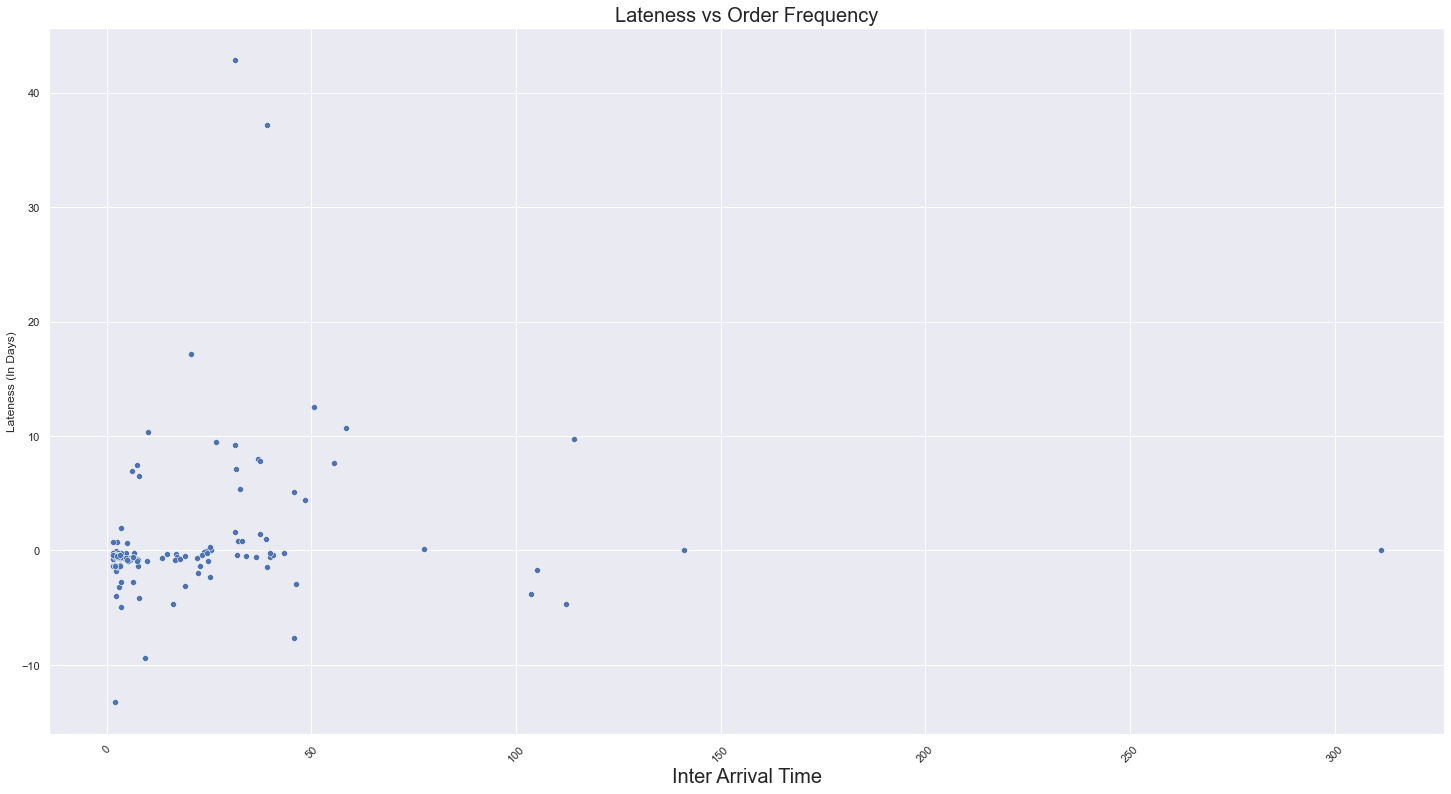

In [34]:
sns.set(rc={'figure.figsize':(25,13)})
g = sns.scatterplot(data=df, y='avg_days_late', x='avg_inter_arrival', marker='o', lw=3)
# g.set_yscale("log")
g.set_xlabel( "Inter Arrival Time" , size = 20 )
g.set_ylabel("Lateness (In Days)")
g.set_title( "Lateness vs Order Frequency" , size = 20 )
plt.xticks(rotation=45)

In [42]:
query = """
SELECT Material, avg(days_late) as avg_lateness, count(*) as total_orders
FROM(
     SELECT PO_Number, PO_Line_Number, Material, Material_Group, Scheduled_relevant_delivery_date, Posting_Date, PO_Document_Date, -(julianday(Scheduled_relevant_delivery_date) - julianday(Posting_Date)) as days_late
     FROM reliability_table
     WHERE Material in (SELECT distinct(part_number) from components_table)
     AND date(Scheduled_relevant_Delivery_Date) < date('2022-05-01')
     ORDER BY date(Scheduled_relevant_delivery_date) desc
) as temp_t
GROUP BY material
"""
df = pd.read_sql_query(query,conn)
df['Late'] = np.where(df.avg_lateness > 0, 'Late', 'On-Time')

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,
         800.,  900.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

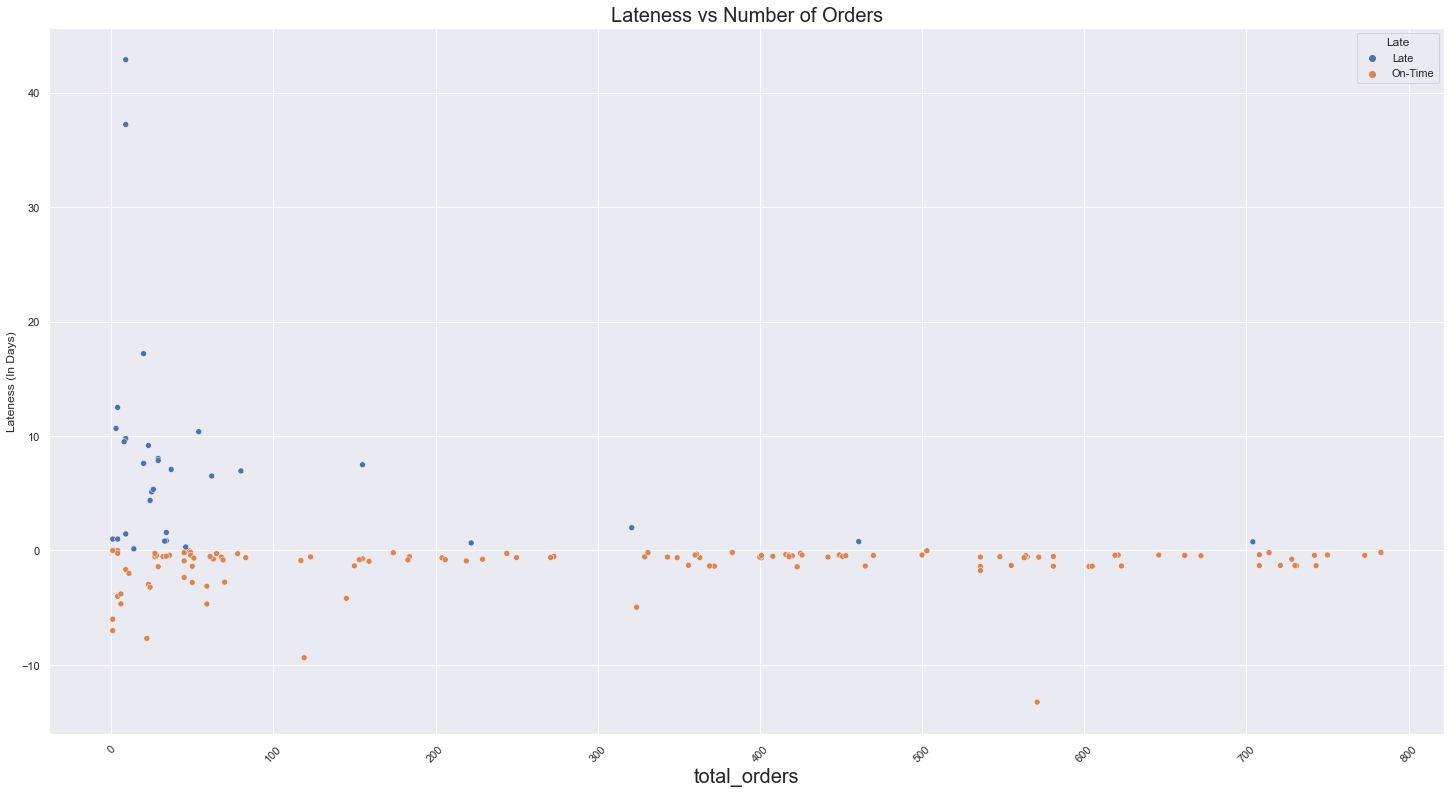

In [43]:
sns.set(rc={'figure.figsize':(25,13)})
g = sns.scatterplot(data=df, y='avg_lateness', x='total_orders', hue= 'Late',marker='o', lw=3)
# g.set_yscale("log")
g.set_xlabel( "total_orders" , size = 20 )
g.set_ylabel("Lateness (In Days)")
g.set_title( "Lateness vs Number of Orders" , size = 20 )
plt.xticks(rotation=45)

Explore the points that are very late, and the points that have been ordered a lot but are still slightly late on average. Fixing these points will improve the supply chain drastically.